In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Data Ingestion
df = pd.read_csv("smart_grid_dataset.csv")
print("Shape of dataset:", df.shape)

Shape of dataset: (50000, 16)


In [3]:
print("Sample Data:\n",df.head())

Sample Data:
              Timestamp  Voltage (V)  Current (A)  Power Consumption (kW)  \
0  2024-01-01 00:00:00   232.483571     5.124673                1.191402   
1  2024-01-01 00:15:00   229.308678    22.213519                5.093753   
2  2024-01-01 00:30:00   233.238443    46.132217               10.759806   
3  2024-01-01 00:45:00   237.615149    47.648972               11.322118   
4  2024-01-01 01:00:00   228.829233     7.410166                1.695663   

   Reactive Power (kVAR)  Power Factor  Solar Power (kW)  Wind Power (kW)  \
0               0.399029      0.907766         46.614845        26.399566   
1               1.248030      0.831813          6.907170        18.555011   
2               2.790464      0.999005         15.477640        12.905025   
3               1.956965      0.896462         35.746398        28.937129   
4               0.624718      0.870681         27.555038        14.184648   

   Grid Supply (kW)  Voltage Fluctuation (%)  Overload Condition  

In [4]:
#Data Preprocessing
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
new = {}
for col in df.columns:
    if 'Temperature' in col and '°' not in col:
        new[col] = col.replace('(\xC2\xB0C)', '(°C)')
if new:
    df.rename(columns=new, inplace = True)
removed_cols = ['Timestamp', 'ID'] if 'ID' in df.columns else ['Timestamp']
df = df.drop(columns=[c for c in removed_cols if c in df.columns])
df=df.dropna()
print("\nAfter Column name Change:\n",df.info())
print("Data after preprocessing:\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Voltage (V)                  50000 non-null  float64
 1   Current (A)                  50000 non-null  float64
 2   Power Consumption (kW)       50000 non-null  float64
 3   Reactive Power (kVAR)        50000 non-null  float64
 4   Power Factor                 50000 non-null  float64
 5   Solar Power (kW)             50000 non-null  float64
 6   Wind Power (kW)              50000 non-null  float64
 7   Grid Supply (kW)             50000 non-null  float64
 8   Voltage Fluctuation (%)      50000 non-null  float64
 9   Overload Condition           50000 non-null  int64  
 10  Transformer Fault            50000 non-null  int64  
 11  Temperature (°C)             50000 non-null  float64
 12  Humidity (%)                 50000 non-null  float64
 13  Electricity Pric

In [5]:
#Train and Test Splitting
target = 'Load' if 'Load' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training sample:", X_train.shape[0])
print("Testing sample:", X_test.shape[0])

Training sample: 40000
Testing sample: 10000


In [6]:
#Model Training & Prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
#Evaluation by Accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:",rmse)
print("R-square Score:",r2*100,"%")

Root Mean Squared Error: 0.20987269243487652
R-square Score: 99.50879657123136 %


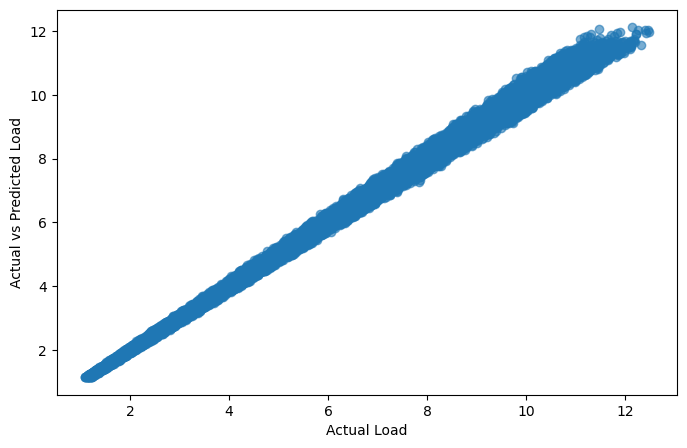

In [8]:
#Validation
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Load")
plt.ylabel("Actual vs Predicted Load")
plt.show()